In [1]:
import seaborn as sns
%matplotlib inline

### **Data**
Tips is an in-built dataset found in Seaborn.

In [2]:
tips = sns.load_dataset('tips')

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Method -** `displot()`
`displot()` returns a visualisation of the distrbution in the form of a histogram.

To remove the kde layer and just have a histogram use `kde=False`

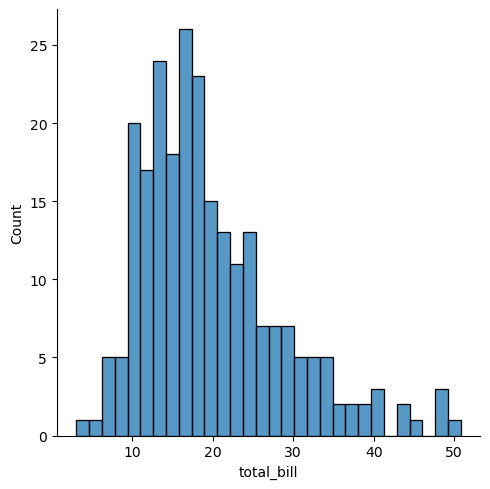

In [11]:
sns.displot(tips['total_bill'],kde=False,bins=30)

### **Method** - `jointplot()`

`jointplot()` allows the user to match up two `displots()` foe bivariate data.

You are free to choose the comparison parameter using `kind='comparison parameter'`

- `kind='scatter'`
- `kind='reg'`
- `kind='resid'`
- `kind='kde'`
- `kind='hex'`

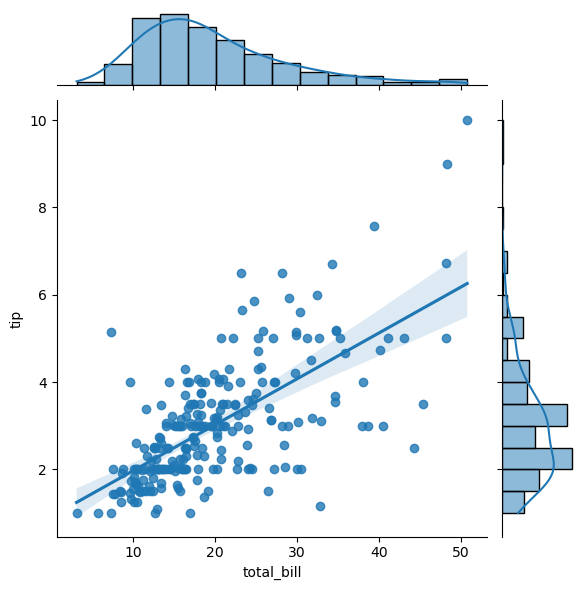

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### **Method -** `pairplot()`

`pairplot()` will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

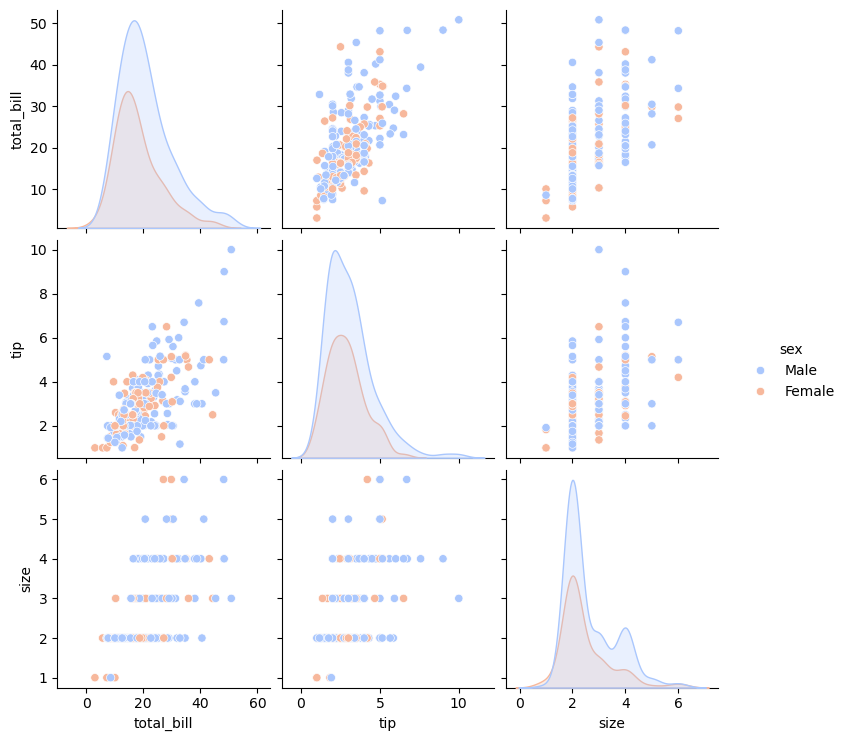

In [24]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### **Method -** `rugplot()`

The `rugplot()` draws a - mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

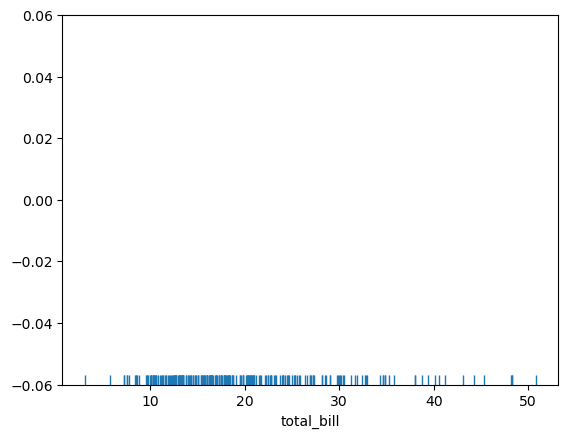

In [26]:
sns.rugplot(tips['total_bill'])

### **Method -** `kdeplot()`

### What is `kdeplot()`?

`kdeplot()` plots a univariate or bivariate distribution using **Kernel Density Estimation (KDE)**.

### <span style="color:blue">**What is a Kernel?**</span>

A **kernel** **is a weighting function**. Each measurement has a **zone of influence**. 

<span style="color:darkgreen">**Key Insight:**</span> A kernel says "this data point infleucnes not just its exact location, but also nearby locations on the x-axis, with influence decreasing as you move away.

### <span style="color:blue">**How KDE Works**</span>

**Kernel Density Estimation = Sum of all kernels**
For each data point in a dataset:

1. Place a kernel centered at that point
2. Add up all the kernels
3. Normalise the total area = 1 (makes it a proper probability density)

### <span style="color:blue">**What Does Bandwidth Control?**</span>

The **bandwidth** controls the width of each kernel:

- **Small bandwidth** --> Narrow kernels --> Wiggly, detailed curve. (might overfit)
- **Large bandwidth** --> Wide kernels --> Smooth curve. (might miss features)

The bandwidth effectively dictates the resolution of an estimate - A bias-variance tradeoff.

(0.0, 1.0)

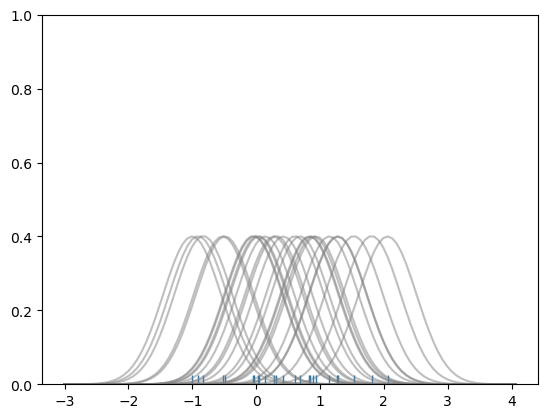

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

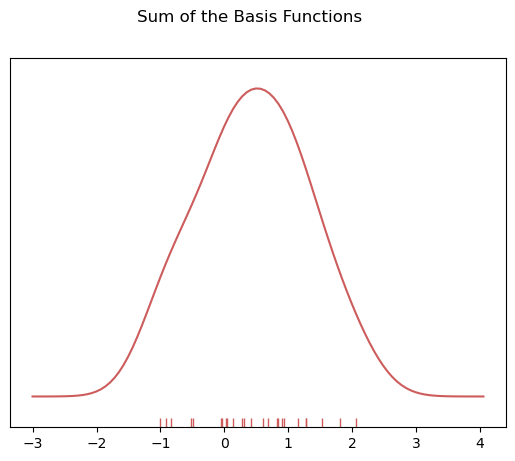

In [33]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")